# Profit & ROC Graph

## Imports

In [200]:
import numpy as np
import collections
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Datengrundlage

In [159]:
data = pd.read_csv("/data/wine.csv")
data.loc[data["Target"] == 3] = 2 # binarsieren
data["Target"] = data["Target"] - 1 # target auf 0 / 1 bringen
x_train, x_test, y_train, y_test = train_test_split(data.drop(["Target"],axis=1),data["Target"])

## Model Training

In [167]:
model = KNeighborsClassifier(n_neighbors=25)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [168]:
profit_tp = 0.2
profit_tn = 0.1
profit_fp = -1
profit_fn = -0.3

## Profit Graph

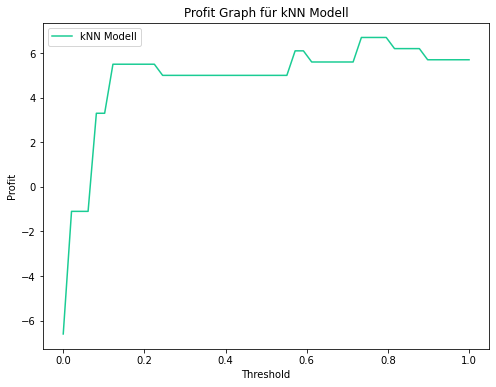

In [169]:
profits = []
for i in np.linspace(0,1):
    probas = model.predict_proba(x_test)[:,1:]
    predictions = np.where(probas >= i,1,0)
    
    errors = predictions-y_test.to_numpy().reshape(-1,1)
    fp = np.count_nonzero(errors == 1)
    fn = np.count_nonzero(errors == -1)
    tp = np.sum(np.where(np.logical_and(errors == 0, predictions == 1),1,0))
    tn = np.sum(np.where(np.logical_and(errors == 0, predictions == 0),1,0))
    profits.append(fp*profit_fp+fn*profit_fn+tp*profit_tp+tn*profit_tn)

plt.figure(figsize=(8,6))
plt.title("Profit Graph für kNN Modell")    
plt.plot(np.linspace(0,1), profits,label="kNN Modell",c="#1ACC94")
plt.xlabel("Threshold")
plt.ylabel("Profit")
plt.legend()
plt.show()

## ROC Graph

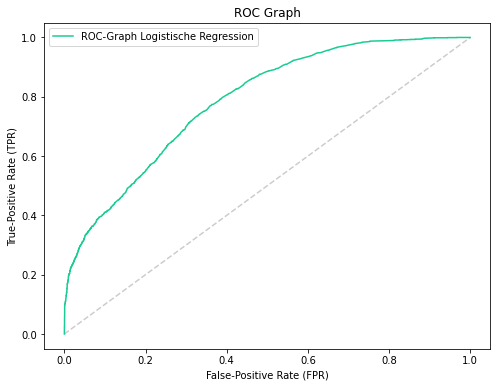

In [198]:
data = pd.read_csv("/data/census.csv")[["age","capital-gain","capital-loss","hours-per-week","target"]]
data["target"] = data["target"].map({" <=50K":0," >50K":1})

x_train, x_test, y_train, y_test = train_test_split(data.drop(["target"],axis=1),data["target"])

model = LogisticRegression()
model.fit(x_train, y_train)

plt.figure(figsize=(8,6))
plt.title("ROC Graph")
fpr, tpr, thresholds = metrics.roc_curve(y_test.values, model.predict_proba(x_test)[:,1:])
plt.plot([0,1],[0,1],ls="--",c="black",alpha=0.2)
plt.plot(fpr,tpr,label="ROC-Graph Logistische Regression",c="#1ACC94")
plt.xlabel("False-Positive Rate (FPR)")
plt.ylabel("True-Positive Rate (TPR)")
plt.legend()
plt.show()

In [138]:
model.predict_proba(data.drop(["Target"],axis=1))[:,1:]

array([[0.04],
       [0.08],
       [0.  ],
       [0.  ],
       [0.64],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.04],
       [0.04],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.36],
       [0.52],
       [0.56],
       [0.08],
       [0.08],
       [0.4 ],
       [0.44],
       [0.  ],
       [0.  ],
       [0.16],
       [0.04],
       [0.  ],
       [0.  ],
       [0.12],
       [0.  ],
       [0.  ],
       [0.16],
       [0.24],
       [0.  ],
       [0.08],
       [0.56],
       [0.48],
       [0.04],
       [0.  ],
       [0.76],
       [0.24],
       [0.04],
       [0.04],
       [0.12],
       [0.04],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.04],
       [0.  ],
       [0.16],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.76],
       [1.  ],
       [0.92],
       [1.  ],
       [1.  ],
       [0.8 ],
       [1.